## Read in v_catch_summary_v2 for marinovich

Based on the HLY2801 Methot Catch Summary notebook, here I plot the georeferenced pie plots of catch.  I've consolidated evrything into the functions in the first cell so the calls can be executed on any year dataset from clams.

I changed from using viridis to definign my own colors:
[0,0,1] # blue
[0,.6,0] # green
[1,0,0] # red
[.5,.5,.1] # brown
[0,0,.4] # dark blue
[.7,0,.7] # purple
[.9,.6,0] # orange
[.9,.6,.8] # pink

In [21]:
import pandas as pd
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib import rcParams
from matplotlib.patches import Patch

etopo1name = '../data/etopo1_bedrock.asc'
topo_file = open(etopo1name, 'r')
ncols = int(topo_file.readline().split()[1])
nrows = int(topo_file.readline().split()[1])
xllcorner = float(topo_file.readline().split()[1])
yllcorner = float(topo_file.readline().split()[1])
cellsize = float(topo_file.readline().split()[1])
topo_file.close()
dres = 1
etopo = np.loadtxt(etopo1name, skiprows=5)
etopo[:nrows+1, :] = etopo[nrows+1::-1, :]
etopo = etopo[::dres, ::dres]

# Create longitude and latitude vectors for etopo
lons = np.arange(xllcorner, xllcorner+cellsize*ncols, cellsize)[::dres]
lats = np.arange(yllcorner, yllcorner+cellsize*nrows, cellsize)[::dres]

# Draw etopo1, first for land and then for the ocean, with different colormaps
llevels = np.arange(-500,2251,100) # check etopo.ravel().max()
#lcs = m.contourf(rlons, rlats, etopo, llevels, cmap=cm.terrain)
#olevels = np.arange(-3500,1,100) # check etopo.ravel().min()
olevels1 = [-1000,-100,-40]
olevels2 = [0,10000]
olevels3 = [0]

def draw_pie(ax,ratios=[0.4,0.3,0.3], X=0, Y=0, size = 1000):
    N = len(ratios)
    xy = []
    s =[]
    col=[]
    start = 0.
    ct = 0
    colors =[[0,0.6,0] ,[.9,.6,0] ,[.9,.6,.8],[.7,0,.7],[0,0,1],[.4,.4,.4], [1,0,0] ,[.5,.5,.1] ,[.3,.8,.76],[.8,.8,.4],[.6,.2,.2],[1,1,1]]
    for ratio in ratios:
        if ratio > 0:
            #col.append(plt.cm.viridis.colors[0::int(len(plt.cm.viridis.colors)/len(marByGroup.group.unique())-1)][1:][ct])
            col.append(colors[ct])
            x = [0] + np.cos(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
            y = [0] + np.sin(np.linspace(2*math.pi*start,2*math.pi*(start+ratio), 30)).tolist()
            xy1 = list(zip(x,y))
            xy.append(xy1)
            s1 = np.abs(xy1).max()
            s.append(s1)
            start += ratio
        ct+=1
    ct = 0
    for xyi, si in zip(xy,s):
        ax.scatter([X],[Y] , marker=(xyi), s=size*si**2, facecolor=col[ct],transform=ccrs.PlateCarree(), zorder=6,edgecolor="k")
        ct+=1

def pieMap(marEvents, marByGroup, year):
    figure = plt.figure(figsize=(18,18),dpi=300)
    rlons, rlats = (np.meshgrid(lons[:-1],lats[:-1]))
    rcParams['contour.negative_linestyle'] = 'solid'
    ax=plt.subplot(121,projection=ccrs.Mercator())
    rcParams['lines.linewidth'] = .5
    lfill = ax.contourf(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
    cso1 = ax.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
    cso4 = ax.contour(rlons, rlats, etopo, olevels3, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
    #ax1.set_extent([-155,-171,59,72.7])

    #ax.plot(marEvents.LONGITUDE,marEvents.LATITUDE,'kx',transform=ccrs.Geodetic(),markersize = 15)
    for event in marByGroup.event.unique():
        X = marEvents.LONGITUDE[marEvents.CLAMS_EVENT_NUMBER == event].values[0]
        Y = marEvents.LATITUDE[marEvents.CLAMS_EVENT_NUMBER == event].values[0]
        draw_pie(ax,np.round([x/sum(marByGroup[marByGroup.event == event].number.values) for x in marByGroup[marByGroup.event == event].number.values],3), X, Y,size=800)

    #ax.plot(mooringRecover.LONGITUDE,mooringRecover.LATITUDE,'.',transform=ccrs.Geodetic(),markersize = 10)
    ax.set_extent([-156,-170,66,73.2])
    #ax.legend(['Vessel Trackline','Bio-Physical Stations','Midwater Trawls'], loc = 7, fontsize='x-large')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
    gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size':24}
    gl.ylabel_style = {'size':24}
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #display(Markdown('### Complete Coverage Map'))

    grpLabel = ['Arctic cod', 'Saffron cod','Pacific cod', 'Walleye pollock','Jellyfish', 'Sand lance','Stichaedae', 'Cottidae','Capelin','Herring','Smelts','Other fishes']
    colors =[[0,0.6,0] ,[.9,.6,0] ,[.9,.6,.8],[.7,0,.7],[0,0,1],[.4,.4,.4], [1,0,0] ,[.5,.5,.1] ,[.3,.8,.76],[.8,.8,.4],[.6,.2,.2],[1,1,1]]

    legendElements = [Patch(facecolor = colors[0], label=grpLabel[0]),
                     Patch(facecolor = colors[1], label=grpLabel[1]),
                     Patch(facecolor = colors[2], label=grpLabel[2]),
                     Patch(facecolor = colors[3], label=grpLabel[3]),
                     Patch(facecolor = colors[4], label=grpLabel[4]),
                     Patch(facecolor = colors[5], label=grpLabel[5]),
                     Patch(facecolor = colors[6], label=grpLabel[6]),
                     #Patch(facecolor = colors[7], label=grpLabel[7]),
                     Patch(facecolor = colors[8], label=grpLabel[8]),
                     Patch(facecolor = colors[9], label=grpLabel[9]),
                     #Patch(facecolor = colors[10], label=grpLabel[10]),
                     Patch(facecolor = colors[11], label=grpLabel[11])]
                     #Patch(facecolor = plt.cm.viridis.colors[0::int(len(plt.cm.viridis.colors)/len(marByGroup.group.unique())-1)][1:][7], label=grpLabel[7])]
    plt.title(str(year)+' Midwater Catch by Abundance',fontsize=20)
    plt.legend(handles=legendElements,loc='upper right',fontsize=18,bbox_to_anchor=[.99,.55])

    ax=plt.subplot(122,projection=ccrs.Mercator())
    rcParams['lines.linewidth'] = .5
    lfill = ax.contourf(rlons, rlats, etopo, olevels2, colors ='lightgrey',transform=ccrs.PlateCarree(),zorder=4)#cmap=cm.ocean)
    cso1 = ax.contour(rlons, rlats, etopo, olevels1, colors ='grey',transform=ccrs.PlateCarree(),zorder=1)#cmap=cm.ocean)
    cso4 = ax.contour(rlons, rlats, etopo, olevels3, colors ='k',transform=ccrs.PlateCarree(),zorder=5)#cmap=cm.ocean)
    #ax1.set_extent([-155,-171,59,72.7])

    #ax.plot(marEvents.LONGITUDE,marEvents.LATITUDE,'kx',transform=ccrs.Geodetic(),markersize = 15)
    for event in marByGroup.event.unique():
        X = marEvents.LONGITUDE[marEvents.CLAMS_EVENT_NUMBER == event].values[0]
        Y = marEvents.LATITUDE[marEvents.CLAMS_EVENT_NUMBER == event].values[0]
        draw_pie(ax,[x/sum(marByGroup[marByGroup.event == event].weight.values) for x in marByGroup[marByGroup.event == event].weight.values], X, Y,size=800)

    #ax.plot(mooringRecover.LONGITUDE,mooringRecover.LATITUDE,'.',transform=ccrs.Geodetic(),markersize = 10)
    ax.set_extent([-156,-170,66,73.2])
    #ax.legend(['Vessel Trackline','Bio-Physical Stations','Midwater Trawls'], loc = 7, fontsize='x-large')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
    gl.xlocator = mticker.FixedLocator([-172, -168, -164, -160, -156, -154])
    gl.ylocator = mticker.FixedLocator([57,60,62,64,66,68,70,72,74])
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size':24}
    gl.ylabel_style = {'size':24}
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #display(Markdown('### Complete Coverage Map'))
    plt.title(str(year)+' Midwater Catch by Weight',fontsize=20)
    plt.legend(handles=legendElements,loc='upper right',fontsize=18,bbox_to_anchor=[.97,.51])
    plt.show()

def sumByGroup(events,catch):
    marEvents = events[events.GEAR == 'Marinovich']
    catch = catch[(catch.GEAR == 'Marinovich')&(catch.NET_PARTITION == 'Codend')]
    catch['group'] = np.zeros(len(catch.SPECIES_CODE))
    groupNames ={1:'Jellyfish',2:'Sand lance',3:'Stichaedae',4:'Cottidae',5:'Capelin',6:'Herring',7:'Smelts',8:'Other Fishes',
             9:'Invertebrates',21725:'Arctic cod', 21735:'Saffron cod',21720: 'Pacific cod',21740: 'Pollock', 21744:'Age-0 Pollock'}
    for i in range(len(catch.SPECIES_CODE)):
        if (catch.SPECIES_CODE.iloc[i] > 40000) and (catch.SPECIES_CODE.iloc[i] < 50000): # jellyfish
            catch.group.iloc[i] = 1
        elif (catch.SPECIES_CODE.iloc[i] > 21700) and (catch.SPECIES_CODE.iloc[i] < 21750): # gadids
            catch.group.iloc[i] = catch.SPECIES_CODE.iloc[i]
        elif (catch.SPECIES_CODE.iloc[i] >= 20202) and (catch.SPECIES_CODE.iloc[i] <= 20204): # sand lance
            catch.group.iloc[i] = 2
        elif (catch.SPECIES_CODE.iloc[i] >= 23800) and (catch.SPECIES_CODE.iloc[i] <= 23810): # prickleback
            catch.group.iloc[i] = 3
       # elif (catch.SPECIES_CODE.iloc[i] >= 21300) and (catch.SPECIES_CODE.iloc[i] <= 21399): # sculpin
       #     catch.group.iloc[i] = 4
        elif (catch.SPECIES_CODE.iloc[i] == 23041) : # capelin
            catch.group.iloc[i] = 5
        elif (catch.SPECIES_CODE.iloc[i] == 21110) : # herring
            catch.group.iloc[i] = 6
       # elif (catch.SPECIES_CODE.iloc[i] == 23055) : # smelts
       #     catch.group.iloc[i] = 7
        elif (catch.SPECIES_CODE.iloc[i] > 10000) and (catch.SPECIES_CODE.iloc[i] < 30000): # other fishes
            catch.group.iloc[i] = 8
        elif (catch.SPECIES_CODE.iloc[i] == 2) : # otherfishes, specifically larvae
            catch.group.iloc[i] = 8
        elif (catch.SPECIES_CODE.iloc[i] >=1100) and (catch.SPECIES_CODE.iloc[i] < 1200): # other invert new codes
            catch.group.iloc[i] = 9
        elif (catch.SPECIES_CODE.iloc[i] > 60000): # other invert old codes
            catch.group.iloc[i] = 9
    marCatch = catch[['CLAMS_EVENT_NUMBER', 'TOTAL_WEIGHT_IN_HAUL','TOTAL_NUMBER_IN_HAUL','group']]
    marEv = []
    marGrp = []
    marTotWt = []
    marTotCt = []
    for event in marCatch.CLAMS_EVENT_NUMBER.unique():
        for grp in [21725.0, 21735.0, 21720.0, 21744, 1.0, 2.0, 3.0, 4.0, 5.0,6.0,7.0,8.0]: # skipping 9.0 which is inverts
            marEv.append(event)
            marGrp.append(grp)
            if sum(marCatch.TOTAL_WEIGHT_IN_HAUL[(marCatch.CLAMS_EVENT_NUMBER == event) & (marCatch.group == grp)]) > 0:
                marTotCt.append(sum(marCatch.TOTAL_NUMBER_IN_HAUL[(marCatch.CLAMS_EVENT_NUMBER == event) & (marCatch.group == grp)]))
                marTotWt.append(sum(marCatch.TOTAL_WEIGHT_IN_HAUL[(marCatch.CLAMS_EVENT_NUMBER == event) & (marCatch.group == grp)]))
            else:
                marTotCt.append(0)
                marTotWt.append(0)
    marByGroup = pd.DataFrame({'event':marEv,'group':marGrp,'weight':marTotWt,'number':marTotCt })
    return marEvents, marByGroup

<ipython-input-21-c3dc1772399f>:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catch['group'] = np.zeros(len(catch.SPECIES_CODE))
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-c3dc1772399f>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catc

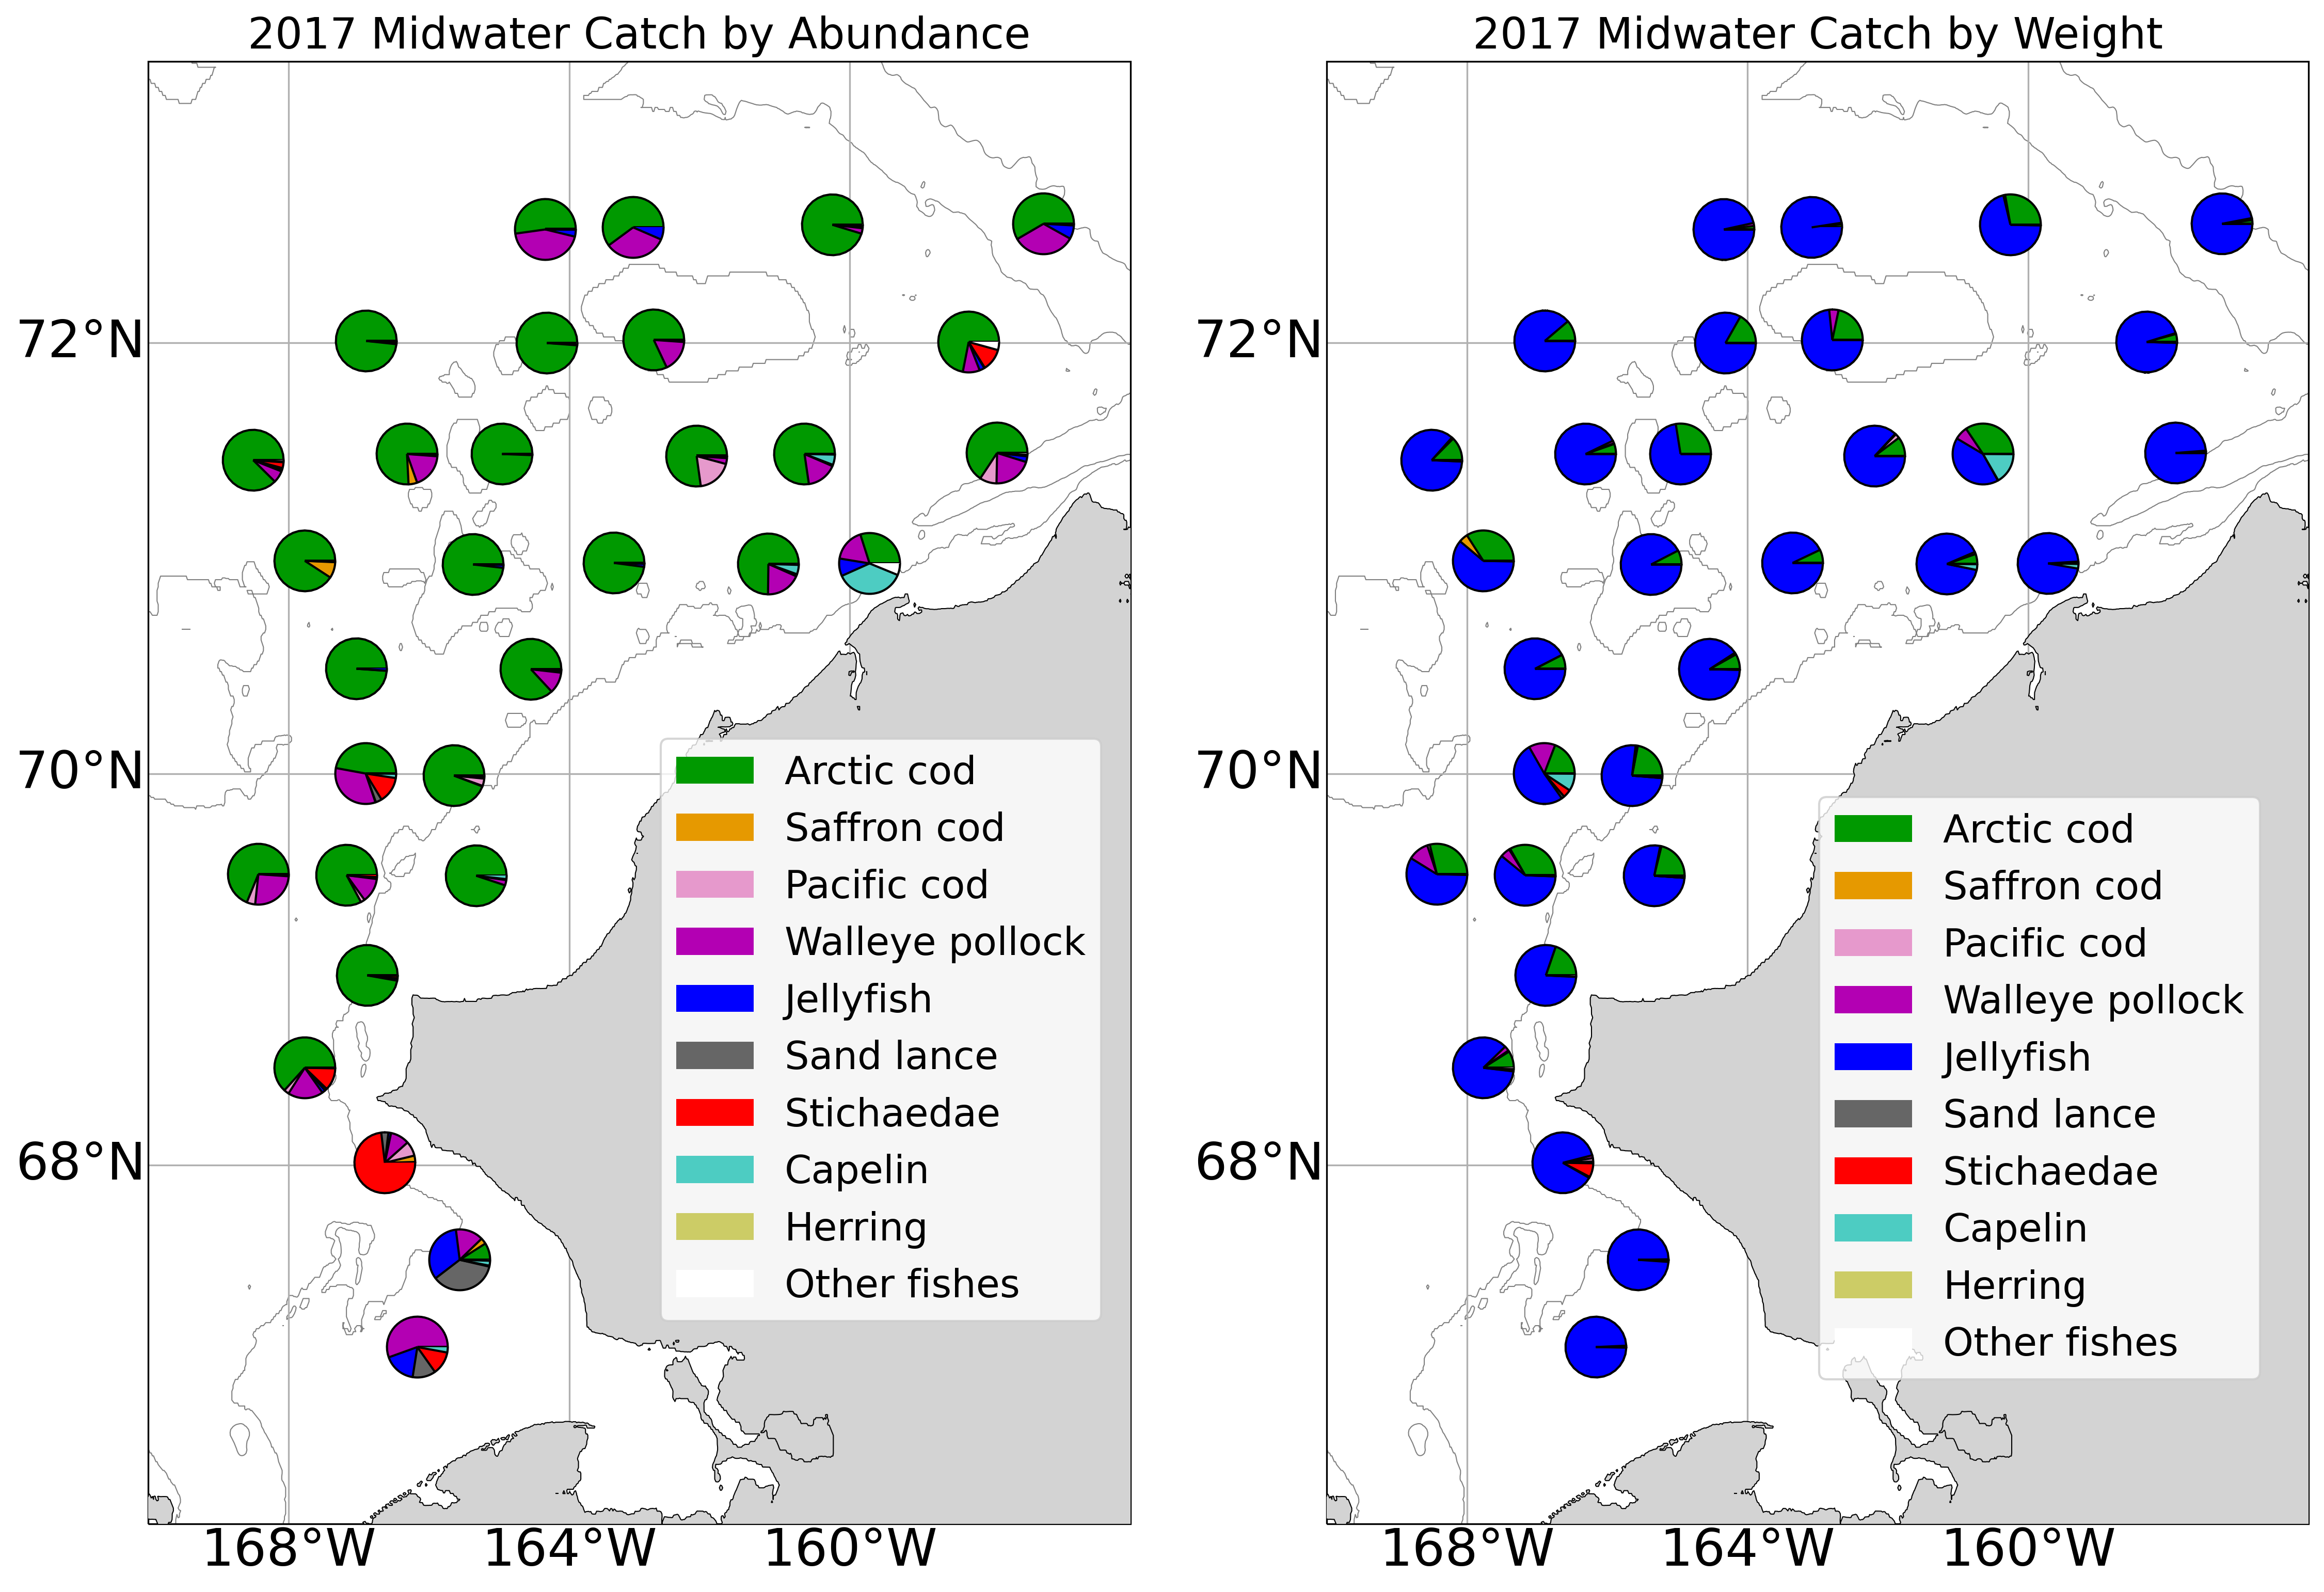

Arctic cod 0.7233214760117171
Saffron cod 0.006026717635840053
Pacific cod 0.014741626649918835
Age-0 Pollock 0.13563780060771932
Jellyfish 0.03147560704421338
Sand lance 0.01809138469433048
Stichaedae 0.04126235808220413
Cottidae 0.0
Capelin 0.01883417200842118
Herring 0.0
Other Fishes 0.0
Invertebrates 0.010608857265635398


In [22]:
catch = pd.read_csv('../data/catchData/2017_2019/catchExport.csv')
events = pd.read_csv('../data/catchData/2017_2019/eventExport.csv')
marEvents, marByGroup = sumByGroup(events[events.SURVEY==201701],catch[catch.SURVEY==201701])
pieMap(marEvents, marByGroup, 2017)
ratio = []
for event in marByGroup.event.unique():
    l=[x/sum(marByGroup[marByGroup.event == event].number.values) for x in marByGroup[marByGroup.event == event].number.values]
    for val in l:
        ratio.append(val)
marByGroup['perAbund'] = ratio
groupNames ={1:'Jellyfish',2:'Sand lance',3:'Stichaedae',4:'Cottidae',5:'Capelin',6:'Herring',7:'Other Fishes',
             8:'Invertebrates',21725:'Arctic cod', 21735:'Saffron cod',21720: 'Pacific cod',21740: 'Pollock', 21744:'Age-0 Pollock'}
for g in marByGroup.group.unique():
    print(groupNames[g],np.mean(marByGroup[marByGroup.group == g].perAbund.values))

<ipython-input-21-c3dc1772399f>:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catch['group'] = np.zeros(len(catch.SPECIES_CODE))
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-21-c3dc1772399f>:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catc

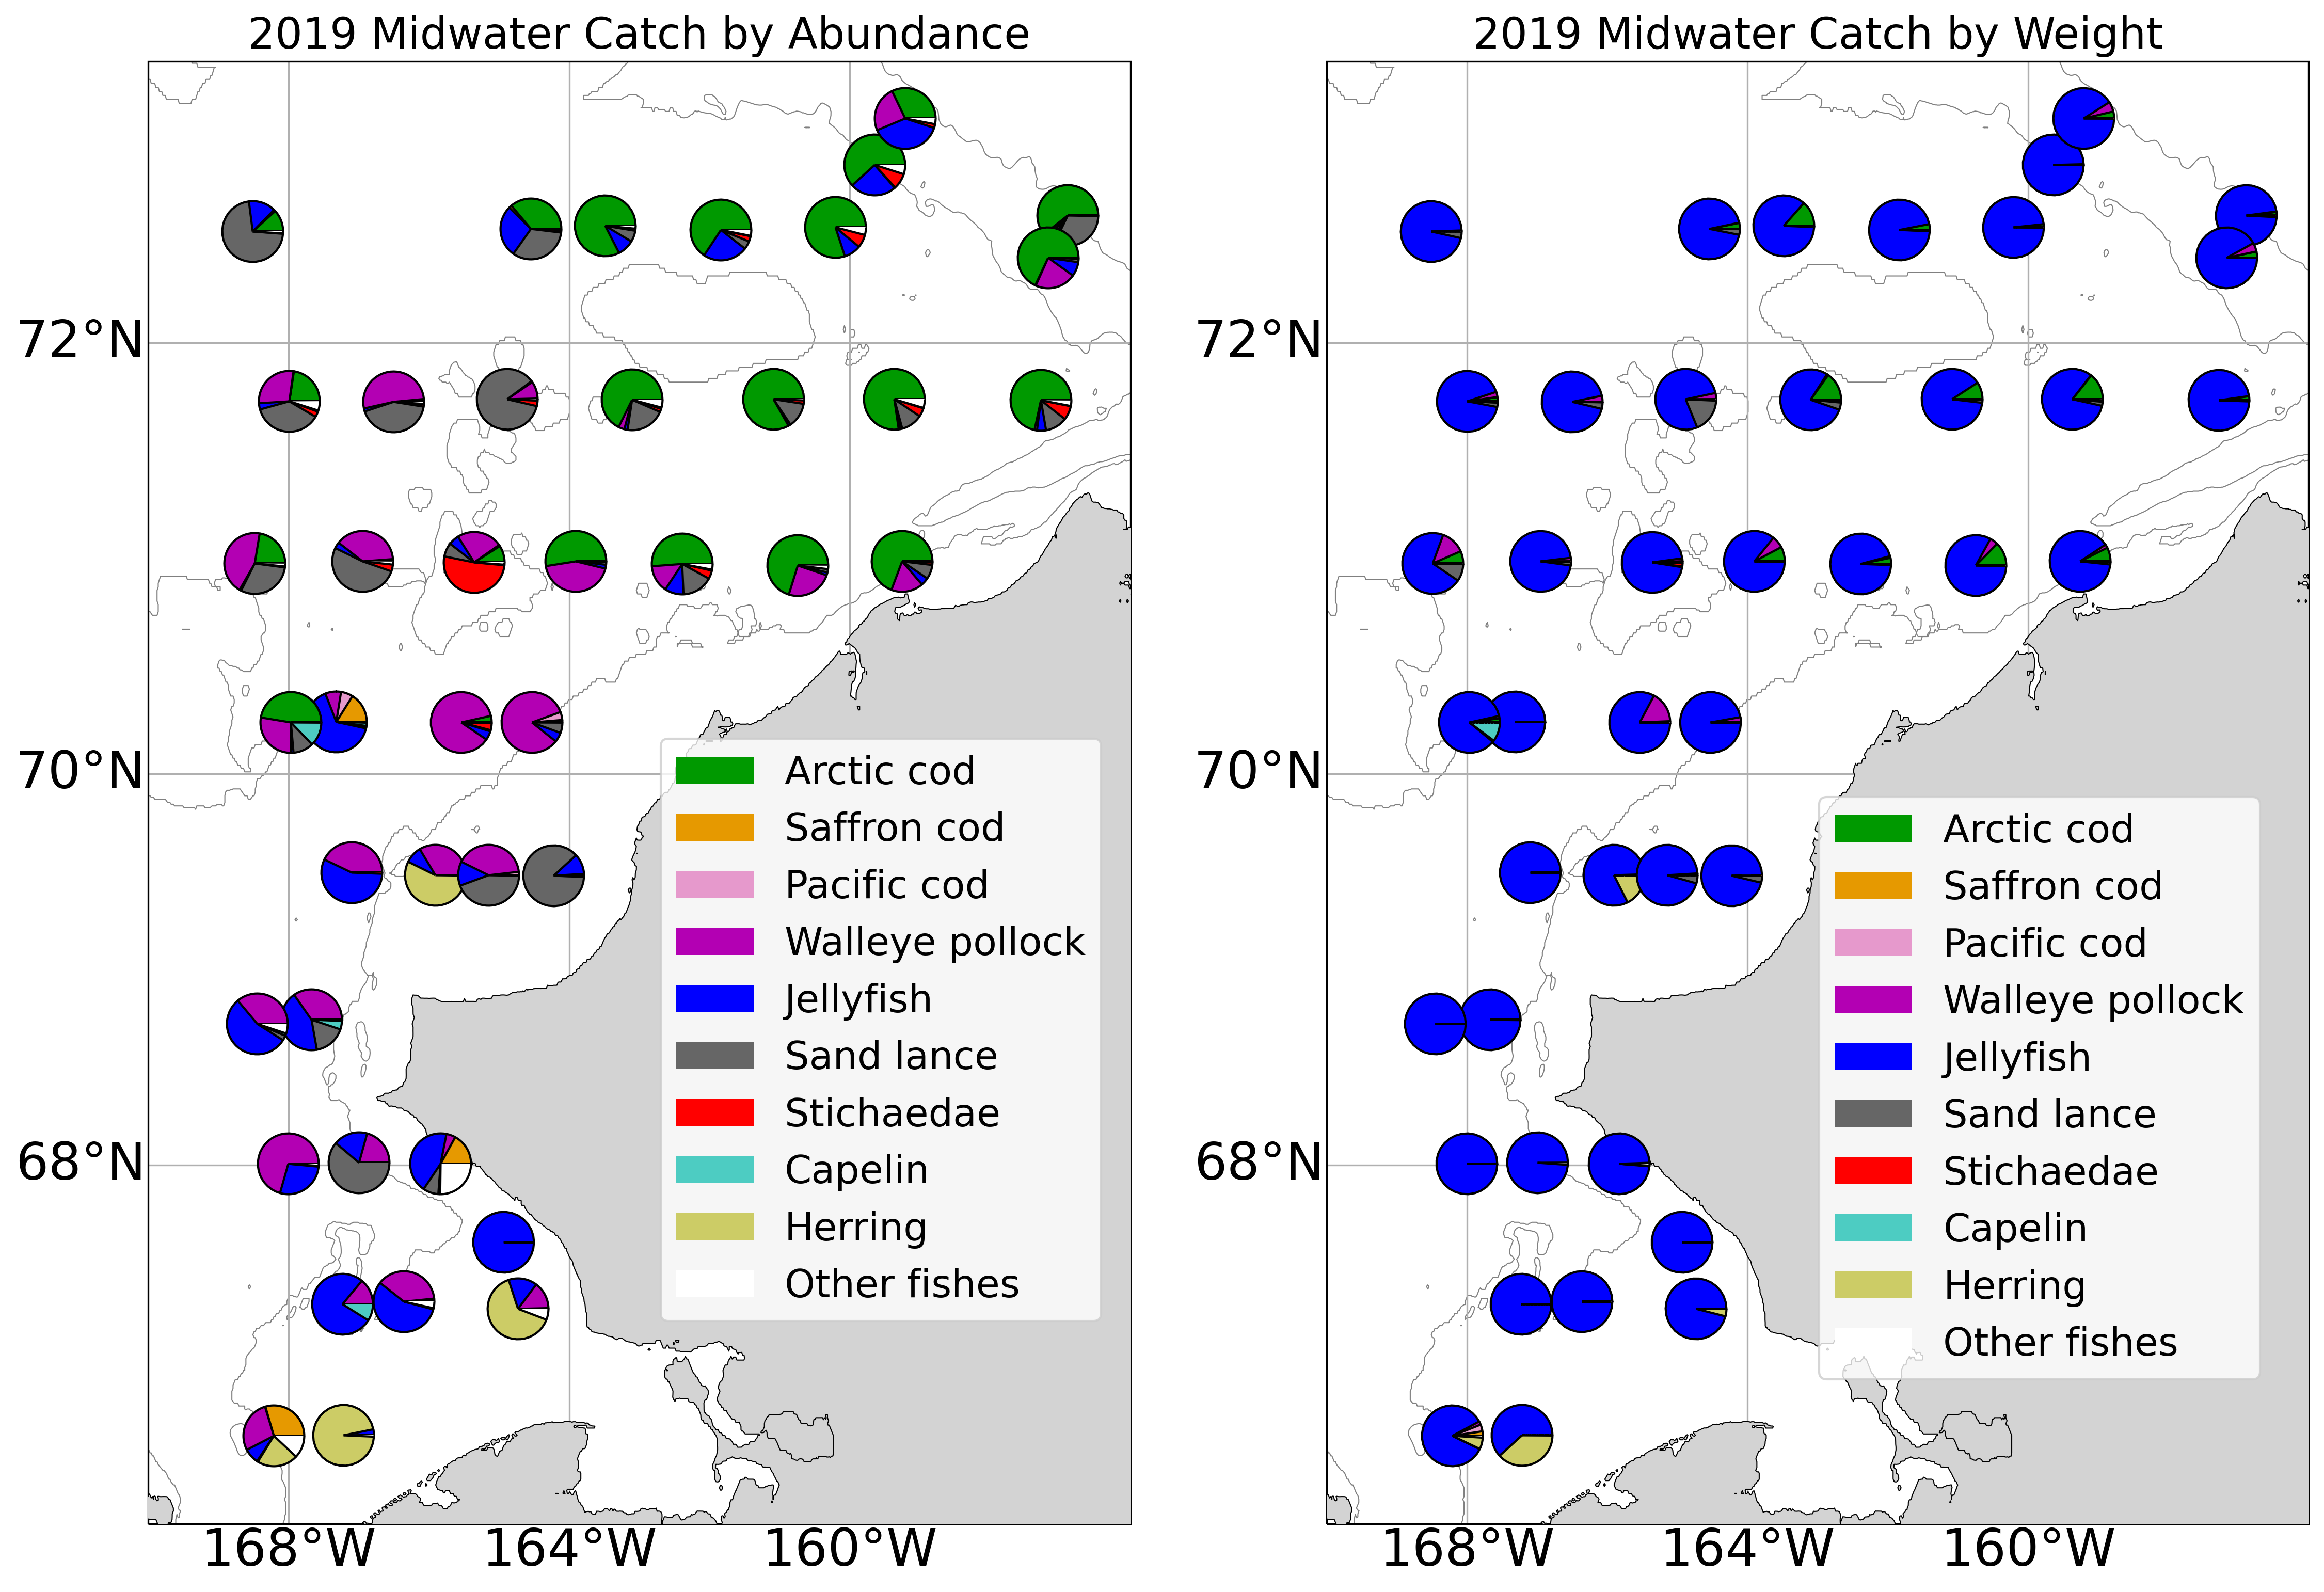

Arctic cod 0.2736243919333862
Saffron cod 0.016464237246525206
Pacific cod 0.0038403404802250228
Age-0 Pollock 0.2227079734131735
Jellyfish 0.19353411481373944
Sand lance 0.17312938444050957
Stichaedae 0.027007488943262336
Cottidae 0.0
Capelin 0.007979728070813099
Herring 0.05723437634142771
Other Fishes 0.0
Invertebrates 0.024477964316937866


In [23]:
marEvents, marByGroup = sumByGroup(events[events.SURVEY==201901],catch[catch.SURVEY==201901])
pieMap(marEvents, marByGroup, 2019)
ratio = []
for event in marByGroup.event.unique():
    l=[x/sum(marByGroup[marByGroup.event == event].number.values) for x in marByGroup[marByGroup.event == event].number.values]
    for val in l:
        ratio.append(val)
marByGroup['perAbund'] = ratio
groupNames ={1:'Jellyfish',2:'Sand lance',3:'Stichaedae',4:'Cottidae',5:'Capelin',6:'Herring',7:'Other Fishes',
             8:'Invertebrates',21725:'Arctic cod', 21735:'Saffron cod',21720: 'Pacific cod',21740: 'Pollock', 21744:'Age-0 Pollock'}
for g in marByGroup.group.unique():
    print(groupNames[g],np.mean(marByGroup[marByGroup.group == g].perAbund.values))

Look at the percent of abundance of the shole survey each group makes up

In [3]:
ratio = []
for event in marByGroup.event.unique():
    l=[x/sum(marByGroup[marByGroup.event == event].number.values) for x in marByGroup[marByGroup.event == event].number.values]
    for val in l:
        ratio.append(val)
marByGroup['perAbund'] = ratio
groupNames ={1:'Jellyfish',2:'Sand lance',3:'Stichaedae',4:'Cottidae',5:'Capelin',6:'Herring',7:'Other Fishes',
             8:'Invertebrates',21725:'Arctic cod', 21735:'Saffron cod',21720: 'Pacific cod',21740: 'Pollock', 21744:'Age-0 Pollock'}
for g in marByGroup.group.unique():
    print(groupNames[g],np.mean(marByGroup[marByGroup.group == g].perAbund.values))

Arctic cod 0.7233214760117171
Saffron cod 0.006026717635840053
Pacific cod 0.014741626649918835
Age-0 Pollock 0.13563780060771932
Jellyfish 0.03147560704421338
Sand lance 0.01809138469433048
Stichaedae 0.04126235808220413
Cottidae 0.0
Capelin 0.01883417200842118
Herring 0.0
Other Fishes 0.0
Invertebrates 0.010608857265635398


## CPUE

In [2]:
dfEvents = pd.read_csv('../data/catchData/2017_2019/AIERP_EventData.csv')

Arctic cod  0.2033941988021821
Pollock  0.026354059223987533
Arctic cod  0.011902546798450252
Pollock  0.009251901854552751


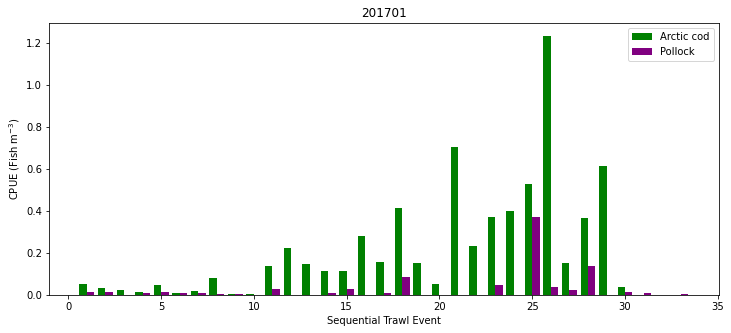

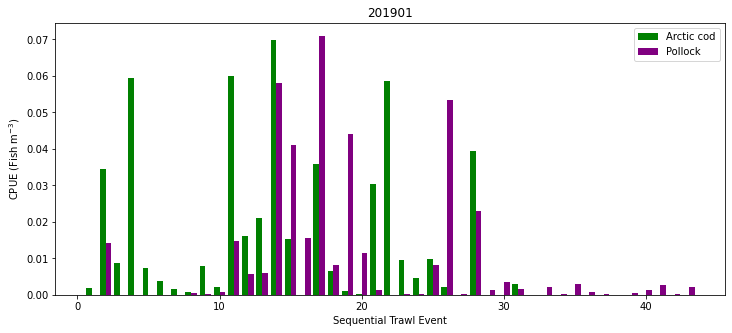

In [7]:
dfPol = catch[(catch.GEAR == 'Marinovich') & ((catch.SPECIES_CODE == 21744) | (catch.SPECIES_CODE == 21740))].merge(dfEvents, how='left',  left_on=['SURVEY','CLAMS_EVENT_NUMBER'],   right_on=['SURVEY','EVENT_ID'])
dfPol['CPUE'] = dfPol.TOTAL_NUMBER_IN_HAUL/dfPol.VOL_FILTERED
dfPolSum = dfPol.groupby(by=['CLAMS_EVENT_NUMBER','SURVEY','EQ_LATITUDE']).sum()
dfPolSum = dfPolSum.reset_index()[['SURVEY','CLAMS_EVENT_NUMBER','EQ_LATITUDE','CPUE']]
dfPolSum['SPECIES_CODE'] = 21744

dfA = catch[(catch.GEAR == 'Marinovich') & (catch.SPECIES_CODE == 21725)].merge(dfEvents, how='left',  left_on=['SURVEY','CLAMS_EVENT_NUMBER'],   right_on=['SURVEY','EVENT_ID'])
dfA['CPUE'] = dfA.TOTAL_NUMBER_IN_HAUL/dfA.VOL_FILTERED
dfASum = dfA.groupby(by=['CLAMS_EVENT_NUMBER','SURVEY','EQ_LATITUDE']).sum()
dfASum = dfASum.reset_index()[['SURVEY','CLAMS_EVENT_NUMBER','EQ_LATITUDE','CPUE']]
dfASum['SPECIES_CODE'] = 21725

dfCPUE = pd.concat([dfASum,dfPolSum])

for survey in [201701, 201901]:
    fig, ax = plt.subplots(figsize = (12,5))
    w = .4
    for spec in [21725, 21744]:
        cpue = []
        for e in dfEvents[dfEvents.SURVEY == survey].EVENT_ID.unique():
            try:
                cpue.append(dfCPUE[(dfCPUE.CLAMS_EVENT_NUMBER == e) & (dfCPUE.SPECIES_CODE == spec)].CPUE.values[0])
            except:
                cpue.append(0)
        if spec == 21725:
            ax.bar(np.arange(1,len(dfEvents[dfEvents.SURVEY == survey].EVENT_ID.unique())+1,1)-w/2,cpue,width = w,color = '#008000')
            print('Arctic cod ',np.mean(cpue))
        else:
            ax.bar(np.arange(1,len(dfEvents[dfEvents.SURVEY == survey].EVENT_ID.unique())+1,1)+w/2,cpue,width = w,color = '#800080')
            print('Pollock ',np.mean(cpue))
    plt.legend(['Arctic cod','Pollock'])
    plt.ylabel('CPUE (Fish m$^{-3}$)')
    plt.xlabel('Sequential Trawl Event')
    plt.title(str(survey))

Text(0, 0.5, 'Latitude')

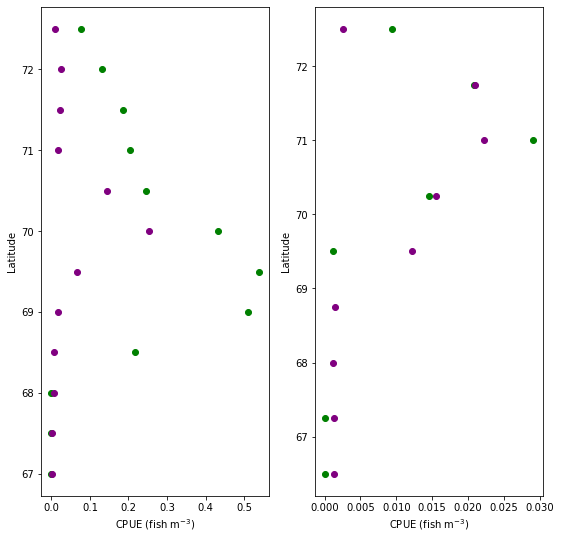

In [104]:
tr17B = .5
tr17 = np.arange(67,72.6,tr17B)
tr19B = .75
tr19 = np.arange(66.5,72.6,tr19B)

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize = (9,9))

for survey in [201701,201901]:
    for spec in [21725,21744]:
        meanCP = []
        curDF = dfCPUE[(dfCPUE.SURVEY == survey) & (dfCPUE.SPECIES_CODE == spec)]
        if survey == 201701:
            tr = tr17
            trB = tr17B
        if survey == 201901:
            tr = tr19
            trB = tr19B
        for i in range(len(tr)):
            meanCP.append((curDF[(curDF.EQ_LATITUDE > (tr[i]-trB)) & (curDF.EQ_LATITUDE < (tr[i]+trB))].CPUE.mean()))
        if survey == 201701:
            if spec == 21744:
                ax1.plot(meanCP, tr17, 'o',color='#800080')
            else:
                ax1.plot(meanCP, tr17, 'o',color='#008000')
        if survey == 201901:
            if spec == 21744:
                ax2.plot(meanCP, tr19,'o',color='#800080')
            else:
                ax2.plot(meanCP,tr19,  'o',color='#008000')
            
ax1.set_xlabel('CPUE (fish m$^{-3}$)')
ax2.set_xlabel('CPUE (fish m$^{-3}$)')
ax1.set_ylabel('Latitude')
ax2.set_ylabel('Latitude')

In [26]:
0.036/0.005

7.199999999999999

In [31]:
totalCatch = catch[(catch.GEAR == 'Marinovich') & (catch.SPECIES_CODE<40000)].merge(dfEvents, how='left',  left_on=['SURVEY','CLAMS_EVENT_NUMBER'],   right_on=['SURVEY','EVENT_ID'])
totalCatch['CPUE'] = totalCatch.TOTAL_NUMBER_IN_HAUL/totalCatch.VOL_FILTERED
print('Ratio ',np.round(totalCatch[totalCatch.SURVEY == 201701].CPUE.mean(),3)/np.round(totalCatch[totalCatch.SURVEY == 201901].CPUE.mean(),3))
print('2017 ',np.round(totalCatch[totalCatch.SURVEY == 201701].CPUE.mean(),3))
print('2019 ',np.round(totalCatch[totalCatch.SURVEY == 201901].CPUE.mean(),3))

Ratio  7.199999999999999
2017  0.036
2019  0.005


In [32]:
totalCatch = catch[(catch.GEAR == 'Marinovich') & (catch.SPECIES_CODE==21725)].merge(dfEvents, how='left',  left_on=['SURVEY','CLAMS_EVENT_NUMBER'],   right_on=['SURVEY','EVENT_ID'])
totalCatch['CPUE'] = totalCatch.TOTAL_NUMBER_IN_HAUL/totalCatch.VOL_FILTERED
print('Ratio ',np.round(totalCatch[totalCatch.SURVEY == 201701].CPUE.mean(),3)/np.round(totalCatch[totalCatch.SURVEY == 201901].CPUE.mean(),3))
print('2017 ',np.round(totalCatch[totalCatch.SURVEY == 201701].CPUE.mean(),3))
print('2019 ',np.round(totalCatch[totalCatch.SURVEY == 201901].CPUE.mean(),3))

Ratio  11.76923076923077
2017  0.153
2019  0.013


In [87]:
gadids = catch[(catch.SURVEY==2012001) &  ((catch.SPECIES_CODE > 21700) & (catch.SPECIES_CODE < 21800))]
print('pollock as percent of gadids north of 66')
gadids[((gadids.SPECIES_CODE == 21744) | (gadids.SPECIES_CODE == 21740)) & (gadids.CLAMS_EVENT_NUMBER < 260)].TOTAL_NUMBER_IN_HAUL.sum()/gadids[(gadids.CLAMS_EVENT_NUMBER < 257)].TOTAL_NUMBER_IN_HAUL.sum()

pollock as percent of gadids north of 66


0.0014253079170321542

In [88]:
gadids = catch[(catch.SURVEY==2013001) &  ((catch.SPECIES_CODE > 21700) & (catch.SPECIES_CODE < 21800))]
print('pollock as percent of gadids north of 66')
gadids[((gadids.SPECIES_CODE == 21744) | (gadids.SPECIES_CODE == 21740)) & (gadids.CLAMS_EVENT_NUMBER < 260)].TOTAL_NUMBER_IN_HAUL.sum()/gadids[(gadids.CLAMS_EVENT_NUMBER < 260)].TOTAL_NUMBER_IN_HAUL.sum()

pollock as percent of gadids north of 66


2.1220710979740478e-05